
# 📘 Chapter 3: Classification and Regression

This chapter introduces the two fundamental supervised learning tasks in machine learning: **classification** and **regression**. The exposition follows a third-person, textbook style with clear mathematical notation and runnable examples.



## 3.1 Supervised Learning Tasks

Supervised learning uses input–output pairs \((X, y)\) to learn a mapping from features to labels. The trained model should generalize to unseen data.



## 3.2 Classification

**Definition.** Classification predicts a **discrete label** from a fixed set of categories.

**Examples.** Spam detection (spam / not spam), digit recognition (0–9), diagnosis categories.

**Mathematical formulation.** Given
$$
D = \{(x^{(i)}, y^{(i)})\}_{i=1}^n, \qquad y^{(i)} \in \{1,2,\dots,K\},
$$
the objective is to learn
$$
h_\theta : \mathbb{R}^d \to \{1,2,\dots,K\}.
$$



## 3.3 Regression

**Definition.** Regression predicts a **continuous value**.

**Examples.** Predicting house prices, forecasting temperatures, estimating weight from height.

**Mathematical formulation.** For
$$
D = \{(x^{(i)}, y^{(i)})\}_{i=1}^n, \qquad y^{(i)} \in \mathbb{R},
$$
the objective is to learn
$$
h_\theta : \mathbb{R}^d \to \mathbb{R}.
$$



## 3.4 Key Differences

| Aspect          | Classification                          | Regression                         |
|-----------------|-----------------------------------------|------------------------------------|
| Output type     | Discrete labels                         | Continuous values                  |
| Typical losses  | Cross-entropy, hinge                    | MSE (L2), MAE (L1)                 |
| Evaluation      | Accuracy, precision, recall, F1-score   | RMSE, $(R^2$)                      |
| Example         | Spam / Not spam                         | House price $(=$) €245k            |



## 3.5 Example: Iris Classification (Logistic Regression)

The Iris dataset is a multi-class classification problem (three species). The workflow below demonstrates train–test split and model fitting.


In [1]:

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Train–test split with stratification to preserve class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Fit multinomial logistic regression
clf = LogisticRegression(max_iter=500, multi_class="auto")
clf.fit(X_train, y_train)

# Predictions and evaluation
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9666666666666667

Classification report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


Confusion matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


c:\Users\zeelp\anaconda3\envs\ml-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



## 3.6 Example: Simple Regression (Petal Length → Petal Width)

This example treats one Iris feature as the predictor and another as the target to illustrate a basic regression fit.


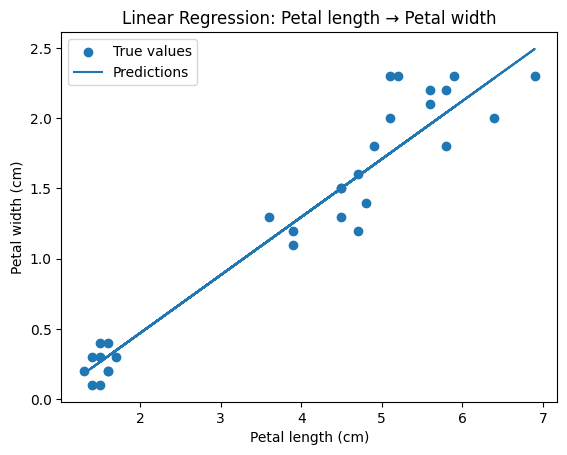

Coefficient: [0.41323829]
Intercept: -0.35666804105655303
MSE: 0.045604284097661846
R^2: 0.9282562958836972


In [2]:

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Single-feature regression: petal length -> petal width
X_single = X[['petal length (cm)']]
y_single = X['petal width (cm)']

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_single, y_single, test_size=0.2, random_state=42
)

reg = LinearRegression()
reg.fit(X_train_r, y_train_r)

y_pred_r = reg.predict(X_test_r)

# Plot: each chart should be standalone and without explicit colors
plt.figure()
plt.scatter(X_test_r, y_test_r, label="True values")
plt.plot(X_test_r, y_pred_r, label="Predictions")
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.legend()
plt.title("Linear Regression: Petal length → Petal width")
plt.show()

print("Coefficient:", reg.coef_)
print("Intercept:", reg.intercept_)
print("MSE:", mean_squared_error(y_test_r, y_pred_r))
print("R^2:", r2_score(y_test_r, y_pred_r))



## 3.7 Summary

- **Classification** predicts discrete categories; **regression** predicts continuous values.  
- Both tasks are formulated using supervised data \((X, y)\).  
- Practical examples illustrated: multivariate logistic regression for species classification and univariate linear regression for a simple numerical relationship.

